### **Build a small feed-forward network for a tabular classification/regression task; compare with classical ML**


TABULAR CLASSIFICATION TASK

Training Logistic Regression
Logistic Regression Accuracy: 0.9737

Training MLP Classifier
MLP Classifier Accuracy: 0.9825


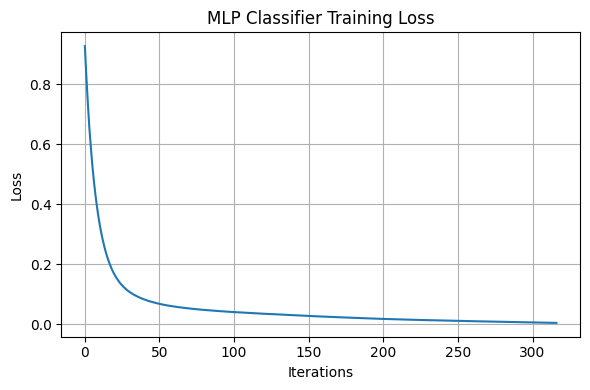


TABULAR REGRESSION TASK

Training Linear Regression
Linear Regression MSE: 0.5559

Training MLP Regressor
MLP Regressor MSE: 0.2743


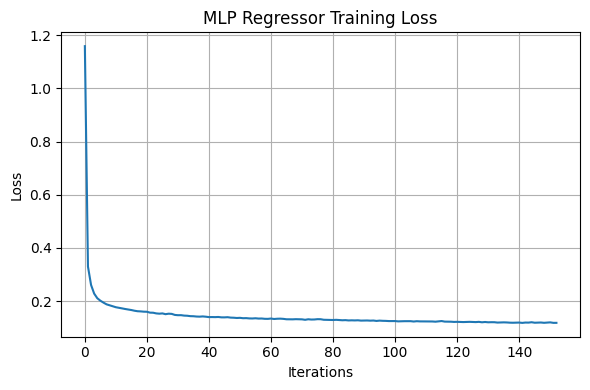


FINAL COMPARISON
Classification Accuracy
Logistic Regression: 0.9737
MLP Classifier: 0.9825

Regression Mean Squared Error
Linear Regression: 0.5559
MLP Regressor: 0.2743


In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor


# Configuration

SEED = 42
TEST_SIZE = 0.2

np.random.seed(SEED)


# Classification Task

print("\nTABULAR CLASSIFICATION TASK")

data = load_breast_cancer()
X_cls, y_cls = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X_cls,
    y_cls,
    test_size=TEST_SIZE,
    random_state=SEED
)

scaler_cls = StandardScaler()
X_train = scaler_cls.fit_transform(X_train)
X_test = scaler_cls.transform(X_test)


# Logistic Regression

print("\nTraining Logistic Regression")

log_model = LogisticRegression(max_iter=5000, random_state=SEED)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {log_acc:.4f}")


# MLP Classifier

print("\nTraining MLP Classifier")

mlp_clf = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=SEED
)

mlp_clf.fit(X_train, y_train)

y_pred_mlp = mlp_clf.predict(X_test)
mlp_acc = accuracy_score(y_test, y_pred_mlp)

print(f"MLP Classifier Accuracy: {mlp_acc:.4f}")


# Plot Classification Loss Curve

plt.figure(figsize=(6, 4))
plt.plot(mlp_clf.loss_curve_)
plt.title("MLP Classifier Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


# Regression Task

print("\nTABULAR REGRESSION TASK")

housing = fetch_california_housing()
X_reg, y_reg = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(
    X_reg,
    y_reg,
    test_size=TEST_SIZE,
    random_state=SEED
)

scaler_reg = StandardScaler()
X_train = scaler_reg.fit_transform(X_train)
X_test = scaler_reg.transform(X_test)


# Linear Regression

print("\nTraining Linear Regression")

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

pred_lin = lin_model.predict(X_test)
lin_mse = mean_squared_error(y_test, pred_lin)

print(f"Linear Regression MSE: {lin_mse:.4f}")


# MLP Regressor

print("\nTraining MLP Regressor")

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=SEED
)

mlp_reg.fit(X_train, y_train)

pred_mlp_reg = mlp_reg.predict(X_test)
mlp_mse = mean_squared_error(y_test, pred_mlp_reg)

print(f"MLP Regressor MSE: {mlp_mse:.4f}")


# Plot Regression Loss Curve

plt.figure(figsize=(6, 4))
plt.plot(mlp_reg.loss_curve_)
plt.title("MLP Regressor Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


# Final Comparison

print("\nFINAL COMPARISON")

print("Classification Accuracy")
print(f"Logistic Regression: {log_acc:.4f}")
print(f"MLP Classifier: {mlp_acc:.4f}")

print("\nRegression Mean Squared Error")
print(f"Linear Regression: {lin_mse:.4f}")
print(f"MLP Regressor: {mlp_mse:.4f}")
